## 2.3 통계 기반 기법
- 말뭉치(Corpus)는 대량의 텍스트 데이터 이다.
- 맹목적으로 수집된 텍스트 데이터가 아닌 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 텍스트 데이터이다.
- Corpus에는 자연어에 대한 사람의 '지식'이 충분히 담겨 있다고 볼 수 있다.

#### 2.3.1 파이썬으로 말뭉치 전처리하기
- 다양한 문장이 말뭉치로 사용될 수 있다, 위키백과, 구글 뉴스, 소설 등
- 전처리란 텍스트 데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환하는 일이다.
- '통계 기반 기법'을 이용해 단어를 벡터로 표현할 수 있다, 그 전에 문장을 전처리 해야한다.

In [1]:
import numpy as np

def preprocess(text):
    # text => words => id list

    text = text.lower()
    text = text.replace('.',' .')

    words = text.split(' ')# 문장을 단어 형태로 분할

    # 단어에 ID를 부여하고 ID의 리스트로 이용할 수 있도록 손질한다.
    word_to_id = {} # 단어로 ID 찾기
    id_to_word = {} # ID로 단어 찾기

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[idx] for idx in words])

    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word= preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)


[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


#### 2.3.2 단어의 분산 표현
- 색상을 RGB로 표현한다면 더 정확하게 명시 할 수 있다, 또한 비슷한 색인지 판단 여부도 벡터를 이용한다면 쉽게 판단할 수 있다.
- 단어를 벡터로 표현함으로써 '단어의 의미'를 정확하게 나타낼 수 있다, 이를 단어의 '분산 표현'이라 한다.

#### 2.3.3 분포 가설
- 단어의 의미는 주변 단어에 의해 형성된다, 이를 분포 가설(Distribution Hypotheis)라 한다.
- 단어 자체는 의미가 없고, 그 단어가 사용된 '맥락'이 의미를 형성한다는 것이다.
- "We drink wine", "We drink beer"처럼 drink 주변에는 음료가 등장하기 쉬우며 "We guzzle wine", "We guzzle beer"을 보면 drink와 guzzle이 같은 맥락에서 사용된 것을 볼 수 있다.
- 따라서 "drink"와 "guzzle"은 같은 의미로 파악 할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/ec26ef9b-a540-49b8-a508-9dbc52caeec4)

- 주변에 단어가 '맥락'에 해당 된다.
- 맥락의 크기를 Window size라고 한다.

#### 2.3.4 동시발생 행렬
- 분포 가설에 기초해 단어를 벡터로 나타내는 방법으로 '주변 단어를 세어 보는'방법이 자연스럽게 떠오른다.
- 어떠 단어에 주목했을 때, 그 주변에 어떤 단어가 몇번이나 등장하는지를 세어 집계하는 방법이다.
- 이를 통계 기반 기법이라 한다.
- 동시발생 행렬을 이용하면 단어를 벡터로 표현할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/72c1b01c-5402-48cf-812f-2bbbe74e66da)
![image](https://github.com/choibigo/Study/assets/38881179/fa40c3d0-8ecc-4782-a794-80b7018c08d4)

- You 주변에 단어들을 (맥락) 파악하여 표로 정리할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/619c112e-cc41-40b5-bbba-cc42904e4363)

- 모든 ID에 대해서 맥락을 파악할 수 있다, 이를 동시발생 행렬 이라고 한다.

In [2]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    # corpus: 단어 ID의 리스트, 어휘 수: corpus에서 사용된 단어 수, 윈도우 크기 이다.
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id]+=1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id]+=1
            
    return co_matrix

co_matrix = create_co_matrix(corpus, len(word_to_id), 1)
print(co_matrix)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


#### 2.3.5 벡터 간 유사도
- 벡터간 유사도를 나타낼 떄는 코사인 유사도를 이용한다.

![image](https://github.com/choibigo/Study/assets/38881179/cad6bd68-3e34-45b0-942e-9c2dc596d25b)

#### Cosine Similarity
- 두 벡터의 유사도를 의미하며 동일한 경우 1, 90°의 각을 이루면 0, 180°로 반대 방향을 가지면 -1을 갖는다
- 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미한다.
- cosin 이 사이의 각도 인데 사이의 각도가 0 에 가까울 수록 방향이 겹치는 것으로 해석할 수 있다.

In [3]:
def cos_similarity(x, y):
    esp = 1e-8
    nx = x / ((np.sqrt(np.sum(x ** 2)))+ esp)
    ny = y / ((np.sqrt(np.sum(y ** 2)))+ esp)

    # 벡터를 정규화 한 이후에 내적을 하여 코사인 유사도를 구했다 (위 식과 같다고함)

    return np.dot(nx, ny)

c0 = co_matrix[word_to_id['you']] # "you"의 단어 벡터 - [0 1 0 0 0 0 0]
c1 = co_matrix[word_to_id['i']] # "you"의 단어 벡터 - [0 1 0 1 0 0 0]

print(cos_similarity(c0, c1))

0.7071067691154799


#### 2.3.6 유사 단어의 랭킹 표시
- 어떤 단어가 주어지면, 그 단어와 비슷한 단어를 유사도 순으로 출력하는 함수를 구해보자

In [29]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''
    query : 검색어
    word_to_id : 단어에서 단어 ID로의 딕션어리
    id_to_word : 단어 ID에서 단어로의 딕션어리
    word_matrix : 단어 벡터들을 한데 모은 행렬 (여기서는 co_matrix 사용, 여러 기법을 통해 단어 벡터를 나타낼 수 있다봄)
    top : 상위 몇개까지 출력할 것인지 결정
    '''

    if query not in word_to_id:
        print(f"쿼리({query})가 딕셔너리에 없음")
        return
    
    # 검색어 정보
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 모든 벡터에 대해 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(query_vec, word_matrix[i])
    
    # 코사인 유사도 기준으로 내림차순 정렬
    for top_count, i in enumerate((-1 * similarity).argsort()):
        if id_to_word[i] == query:
            continue

        print(f"{id_to_word[i]}: {similarity[i]}")
        
        if top_count >= top:
            return
        
        


most_similar("you", word_to_id, id_to_word, co_matrix)
'''
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0

처럼 나타 났다.
i와 you가 유사하다는 것은 이해가 가지만 나머지는 이상하다, 이는 corpus가 너무 작아서 나타나는 현상이다.
'''


IndexError: index 316 is out of bounds for axis 0 with size 7

## 통계 기반 기법 개선하기
- 단어의 동시발생 행렬은 만들었다.
- 동시발생 행렬에는 아직 개선할 점이 있다
- 이를 통해 더 실용적인 말뭉치를 사용하여 '진짜'단어의 분산 표현을 할 수 있다.

#### 2.4.1 상호정보량
- 동시발생 행렬의 원소는 두 단어가 동시에(window size내 발생) 발생한 횟수를 나타낸다.
- "발생" 횟수라는 것은 좋은 특징은 아니다, 고빈도 단어를 보면 바로 확인할 수 있다.
- "the"와 "car"의 동시발생을 생각해 보면 분명 "... the car..."라는 문구가 자주 보일 것이다. 따라서 the와 car가 상관 관계가 높다고 판단할 수 있다.
- 그러나 실제 언어에서는 the와 car 관게보다 car와 drive 관련이 더 깊다.
- 단순히 등장 횟수만 본다면 car는 drive보다 the와의 관련성이 훨씬 높다고 판단 될 수 있다.
- 이 문제를 해결하기 위해 점별 상호 정보량(Pointwise Mutual Information)이라는 척도를 사용할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/20340e2b-5c86-4619-bede-7d7f4227068e)

- P(x)는 x가 일어날 확률, P(y)는 y가 일어날 확률, P(x, y)는 x와 y가 동시에 일어날 확률을 의미한다.이 PMI 값이 높다면 관련성이 높다는 의미이다.
- P(x)는 x가 말뭉치에 등장할 확률을 가리킨다.
- 예를 들어 10000개의 단어로 이루어진 말뭉치에 "the"가 100번 등장한다면 P("the")는 100/10000 = 0.01이다.
- "the"와 "car"가 10번 동시발생했다면 P("the", "car") = 10 / 10000= 0.001이 되는 것이다.
- C(x)를 동시 발생 횟수로 했을때 식을 재정의할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/29bd68d7-e8c9-4fd8-9dc9-f9885a6b3021)

- 이때 corpus에 포함된 단어의 수가 N이다.(전체 단어의 총 동시발생 횟수)
- 총 단어수 : 10000
- "the" : 1000
- "car" : 20
- "drive": 10
- "the" & "car" : 10 
- "car" & "drive" : 5 
- 동시발생 횟수 관점에서는 "car"는 "drive"보다 "the"와 관련이 더 깊다고 말할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/4cee6014-8009-4399-b3fc-c7126bb46904)
![image](https://github.com/choibigo/Study/assets/38881179/cd2d9e29-7f15-4670-a9e3-9b093f966d2f)

- PMI를 사용한다면 "car"와 "drive"가 더 관련이 깊다고 나온다.
- 이러한 이유는 단어가 단독으로 출현하는 횟수가 고려 되었기 때문이다
- 반대로 말하면 동시발생 횟수의 문제점은 단어가 단독으로 출현하는 경우를 고려하지 않았기 때문에 성능이 좋지않다.
- PMI를 그대로 사용한다면 동시발생횟수가 0 일때 -∞가 된다.
- 따라서 양의정보량(Positive PMI: PPMI)를 사용한다.
- PPMI(x,y) = max(0, PMI(x,y))
- PMI가 음수일 때는 0으로 취급한다.
- PPMI의 각 원소는 0 이상이다.
- 동시발행 행렬보다 더 좋은 척도가 된다.
- PPMI의 큰 문제점은 벡터의 차원이 증가함에 따라 차원의 수도 증가 하게 된다.
- 예를 들어 corpus가 10만이라면 벡터의 차원수도 10만이 된다, 10만 차원의 벡터를 다룬다는 것은 현실적이지 않다.
- PPMI 행렬을 보면 대부분이 0인것을 알 수 있다 즉, 벡터 원소 대부분이 중요하지 않다는 것이다. 다르게 포현하면 대부분의 원소의 '중요도'가 낮다는 것이다.
- 이런 벡터는 노이즈에 약하고 견고하지 못한 약점도 있다.
- 이러한 문제를 해결하고자 자주 수행하는 것이 벡터의 차원 감소이다.

In [22]:
def ppmi(C, verbose=False):
    '''
    C: co_matrix
    verbose(=말 수가 많은): 진행상황 출력 여부
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[j]*S[i]) + 1e-8)
            M[i,j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f}% 완료')

    print("PPMI Calculate END")

    return M

ppmi_matrix = ppmi(co_matrix)

print(ppmi_matrix)

PPMI Calculate END
[[0.        1.8073549 0.        0.        0.        0.        0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355 ]
 [0.        0.        0.        0.        0.        2.807355  0.       ]]


#### 2.4.2 차원감소
- 차원 감소는 문자 그대로 벡터의 차원을 줄이는 방법을 말한다.
- 단순히 차원을 줄이는게 아니라, '중요한 정보'는 최대한 유지하면서 줄이는 게 핵심이다.

![image](https://github.com/choibigo/Study/assets/38881179/e219d7d9-70bf-4eb4-889a-c752b49ea35c)

- 위 그림처럼 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행한다.
- 중요한 축을 찾는 다면 각데이터를 축에 사영 시켜 데이터를 축소할 수 있다. (위그림에서는 1차원 으로 표현할 수 있다.)
- 여기서 가장 중요한 것은 데이터를 가장 잘 표현하는 축을 찾는 것이다.
- 차원을 감소 시키는 방법은 SVD를 통해할 수 있다.

#### 2.4.3 SVD에 의한 차원 감소
- SVD는 numpy의 linalg 모듈로 실행 할 수 있다. 

![image](https://github.com/choibigo/Study/assets/38881179/3a937dff-6df2-480e-ac2a-fadc20450608)

- SVD를 이용하여 임의의 행렬을 세 행렬의 곱으로 분해하여 표현할 수 있다.
- U와 V는 직교 행렬이고, 그 열벡터는 서로 직교한다.
- S는 대각행렬로 eigen value 의 집합이다.

![image](https://github.com/choibigo/Study/assets/38881179/a49d555e-4f78-4260-928c-ebf130de6f72)

- U는 직교 행렬로 이 행렬을 '단어 공간'으로 취급할 수 있다.
- egien value순으로 정렬 되어 나오기 때문에 그 순서가 데이터의 미치는 중요도 순으로 나온다.
- 중요도가 낮은 벡터를 줄여서 차원을 축소 할 수 있다.

![image](https://github.com/choibigo/Study/assets/38881179/3d5151da-ea8f-4a6c-bd26-ef4c97dfbea6)

- 원래 단어를 SVD 한 이후에 U의 열벡터를 깍아서 (실제로는 s의 원소(eigen value)가 작은 애들을 없애는것) 데이터를 근사할 수 있다.
- x의 각 행에는 해당 단어 ID의 단어 벡터가 저장되어 있으며, 그 단어 벡터가 U'라는 차원 감소된 벡터로 표현되는 것이다.

#### 희소 표현
- 원-핫 벡터로 데이터를 표현하면 단어의 인덱스만 1이고 나머지인덱스는 모두 0이다.
- 단어 집합이 클수록 고차원의 벡터가 되고 대부분이 0이다.
- 이때 이러한 벡터 표현은 공간적 낭비가 된다.
- 이러한 표현 방법을 희소 표현이라하며 이렇게 표현된 벡털르 희소 벡터라고 한다.

#### 밀집 벡터
- 희소 벡터와 반대되는 개념이다.
- 1000개의 단어를 원핫 벡터로 1000차원으로 표현 했을떄 차원 축소를 해 128 차원으로 표현 했다면 모든 벡터의 원소가 실수 값이 된다. 이때 벡터의 차원이 더 조밀해 졌다고 한다.

[0.        1.8073549 0.        0.        0.        0.        0.       ]
[ 3.4094876e-01 -1.1102230e-16 -1.2051624e-01 -3.3306691e-16
 -9.3232495e-01  0.0000000e+00 -2.4257469e-17]
[[ 3.4094876e-01 -1.1102230e-16 -1.2051624e-01 -3.3306691e-16
  -9.3232495e-01  0.0000000e+00 -2.4257469e-17]
 [ 0.0000000e+00 -5.9763640e-01  0.0000000e+00  1.8023790e-01
   0.0000000e+00 -7.8124583e-01  0.0000000e+00]]


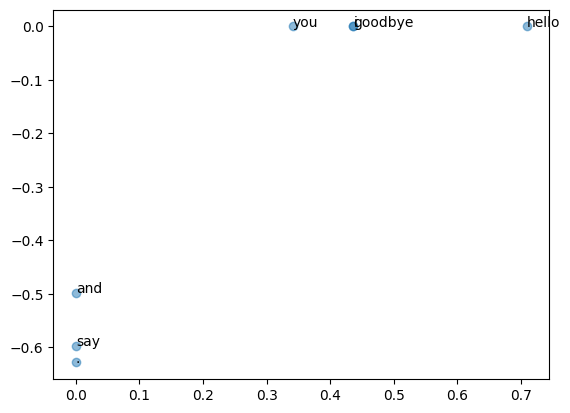

'\n- goodby와 hello가 가깝고 you와 i가 가까운 것을 확인할 수 있다.\n'

In [6]:
import matplotlib.pyplot as plt


U, S, V = np.linalg.svd(ppmi_matrix) # ppmi의 결과의 대부분은 0으로 채워져 있기 때문에 차원 축소를 해서 표현하는 것이 효율적이다

print(ppmi_matrix[0])
print(U[0]) # 0 이었던 값들이 실수 값으로 채워지면서 밀집 벡터가 됬다.
print(U[0 :2]) # 차원 축소를 하기 위해 처음 2개의 원소를 꺼내면 된다(Eigen value 순으로 정렬 되있기 때문)

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()
'''
- goodby와 hello가 가깝고 you와 i가 가까운 것을 확인할 수 있다.
'''

#### 2.4.4 PTB 데이터셋
- PTB corpus는 텍스트 파일로 제공되며, 원래의 PTB 문장에 전처리를 해둔 상태이다.
- 문장이 하나의 줄로 저장되어 있다.
- 각 문장을 연결한 하나의 큰 시계열 데이터로 취급할 수 있다, 이때 각 문장 끝에는 <eos>라는 특수 문자를 삽입한다.

In [14]:
import sys
# sys.path.append('../data_set')
sys.path.append('..')

from data_set import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train') # ptb를 읽어서 corpus, word_to_id, id_to_word 반환 함수

print(f"말뭉치 크기: {len(corpus)}")
print(f"corpus[:30]: {corpus[:30]}")
print()
print(f"id_to_word[0]: {id_to_word[0]}")
print(f"id_to_word[1]: {id_to_word[1]}")
print(f"id_to_word[2]: {id_to_word[2]}")
print()
print(f"word_to_id['car']: {word_to_id['car']}")
print(f"word_to_id['happy']: {word_to_id['happy']}")
print(f"word_to_id['lexus']: {word_to_id['lexus']}")



말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


#### 2.4.5 PTB 데이터셋 평가
- 큰행렬에 SVD를 적용해야 함으로 고속 SVD를 적용한다.
- sklearn 모듈을 설치하여 SVD를 사용할 수 있다.

In [23]:
import sys
sys.path.append('..')
import numpy as np
from data_set import ptb

window_size = 2 # 동시 발생 계산시 window 크기
wordvec_size = 100 # 압축 차원

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

# 동시발생 수 계산
C = create_co_matrix(corpus, vocab_size, window_size)

# PPMI 계산
W = ppmi(C, True)


C:\Users\cbigo\AppData\Local\Temp\ipykernel_20724\2148773683.py:14: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2(C[i,j] * N / (S[j]*S[i]) + 1e-8)
C:\Users\cbigo\AppData\Local\Temp\ipykernel_20724\2148773683.py:14: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i,j] * N / (S[j]*S[i]) + 1e-8)


1.00% 완료
2.00% 완료
3.00% 완료
4.00% 완료
5.00% 완료
6.00% 완료
7.00% 완료
8.00% 완료
9.00% 완료
10.00% 완료
11.00% 완료
12.00% 완료
13.00% 완료
14.00% 완료
15.00% 완료
16.00% 완료
17.00% 완료
18.00% 완료
19.00% 완료
20.00% 완료
21.00% 완료
22.00% 완료
23.00% 완료
24.00% 완료
25.00% 완료
26.00% 완료
27.00% 완료
28.00% 완료
29.00% 완료
30.00% 완료
31.00% 완료
32.00% 완료
33.00% 완료
34.00% 완료
35.00% 완료
36.00% 완료
37.00% 완료
38.00% 완료
39.00% 완료
40.00% 완료
41.00% 완료
42.00% 완료
43.00% 완료
44.00% 완료
45.00% 완료
46.00% 완료
47.00% 완료
48.00% 완료
49.00% 완료
50.00% 완료
51.00% 완료
52.00% 완료
53.00% 완료
54.00% 완료
55.00% 완료
56.00% 완료
57.00% 완료
58.00% 완료
59.00% 완료
60.00% 완료
61.00% 완료
62.00% 완료
63.00% 완료
64.00% 완료
65.00% 완료
66.00% 완료
67.00% 완료
68.00% 완료
69.00% 완료
70.00% 완료
71.00% 완료
72.00% 완료
73.00% 완료
74.00% 완료
75.00% 완료
76.00% 완료
77.00% 완료
78.00% 완료
79.00% 완료
80.00% 완료
81.00% 완료
82.00% 완료
83.00% 완료
84.00% 완료
85.00% 완료
86.00% 완료
87.00% 완료
88.00% 완료
89.00% 완료
90.00% 완료
91.00% 완료
92.00% 완료
93.00% 완료
94.00% 완료
95.00% 완료
96.00% 완료
97.00% 완료
98.00% 완료
99.00% 완료
100.00% 완료
PPMI Cal

In [30]:
# SVD 계산
from sklearn.utils.extmath import randomized_svd

U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

word_vecs = U[:, : wordvec_size] # word vector 차원 축소

querys = ['you', 'year', 'car', 'toyota']

for query in querys:
    print(f"[{query}]")
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5) # 각 query와 유사한 단어 5개 씩을 출력해 준다.
    print()
    

[you]
i: 0.7025728225708008
we: 0.6673679947853088
do: 0.6136865019798279
anybody: 0.6042898297309875
'd: 0.5212484002113342

[year]
earlier: 0.6588015556335449
month: 0.6476756930351257
quarter: 0.6124095916748047
fiscal: 0.5512375831604004
last: 0.5508217811584473

[car]
auto: 0.6499615907669067
luxury: 0.5790735483169556
corsica: 0.567619264125824
vehicle: 0.528739333152771
gm: 0.5130618810653687

[toyota]
motor: 0.76077800989151
motors: 0.6462806463241577
nissan: 0.6405166387557983
honda: 0.6358739137649536
mazda: 0.6281181573867798



## 2.5 정리
- 자연어를 대상으로 컴퓨터에게 '단어의 의미'를 이해 시키기 위해서 시소러스, 통계 기반 기법이 있다.
- 시소러스 기반 기법은 단어들의 관련성을 사람이 수작업으로 하나씩 정의 한다.
- 이 작업은 비용이 많이 들고 표현력에도 한계가 있다.
- 통계 기반 기법은 말뭉치로부터 단어의 의미를 자동으로 추출하고, 그 의미를 벡터로 표현한다.
- 단어의 동시발생 행렬을 만들고 PPMI 행렬로 변환한 다음, 안전성을 높이기 위해 SVD를 이용해 차원을 감소시켜 각 단어의 분산표현을 만들어 낸다.